In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import random, shuffle
import itertools

# Make the Tensor

In [2]:
# make a fully connected graph
size = 10
nodes = [x for x in range(0, size)]
s = (size, size)
mCom = np.ones(s)
g = nx.Graph(mCom)

mCom, nodes

(array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]]),
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

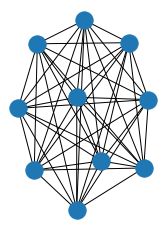

In [3]:
# look at it for fun
plt.subplot(121)
nx.draw(g)

In [4]:
# separate into 2 communities
shuffle(nodes)

first_community = nodes[:int(size/2)]
second_community = list(set(nodes) - set(first_community))

nodes, first_community, second_community

([7, 2, 9, 5, 4, 3, 1, 8, 6, 0], [7, 2, 9, 5, 4], [0, 1, 3, 6, 8])

In [5]:
# going to use some python slickness here
connections = [i for i in itertools.combinations_with_replacement(nodes, 2)]

connections[:4]

[(7, 7), (7, 2), (7, 9), (7, 5)]

In [6]:
# remove "allowed connections"
first_community_connections = [i for i in itertools.permutations(first_community, 2)]
second_community_connections = [i for i in itertools.permutations(second_community, 2)]
loops = [(x,x) for x in range(0,size)]

connections = list(set(connections) - set(first_community_connections))
connections = list(set(connections) - set(loops))
illegal_connections = list(set(connections) - set(second_community_connections))

illegal_connections

[(7, 3),
 (9, 1),
 (4, 8),
 (5, 6),
 (2, 8),
 (9, 8),
 (2, 1),
 (5, 1),
 (5, 8),
 (4, 0),
 (9, 0),
 (7, 6),
 (5, 0),
 (4, 1),
 (2, 6),
 (7, 1),
 (9, 3),
 (2, 3),
 (9, 6),
 (5, 3),
 (7, 0),
 (4, 6),
 (2, 0),
 (4, 3),
 (7, 8)]

In [7]:
# choose a "link" that will be the final connection between the two communities before they would become separate
shuffle(illegal_connections)
link = illegal_connections.pop()
illegal_connections = list(set(illegal_connections) - set(link))

link

(2, 6)

In [8]:
# for each of the remaining connections, remove it
results = []

for x in illegal_connections:
    mCom[x[0]][x[1]] = 0
    mCom[x[1]][x[0]] = 0
    
    results.append(mCom.copy())


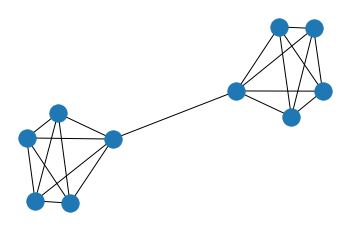

In [9]:
g_draw = nx.Graph(mCom, with_labels=True, font_weight='bold')
plt.figure()
plt.plot()
nx.draw(g_draw)
plt.show()

In [338]:
t = np.array(results)
#a,b,c = t.shape
#t = t.reshape(b, a, c)
t.shape

(24, 10, 10)

# Decompose

In [352]:
from L_svd import L_svd
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt

In [327]:
# to multiply two tensors
def t_prod(A, B):
    [a1 ,a2 ,a3] = A.shape
    [b1 ,b2 ,b3] = B.shape
    A = fft(A, axis = -1)
    B = fft(B, axis = -1)
    C = np.zeros((a1,b2,b3), dtype = complex)
    for i in np.arange(b3):
        C[:,:,i]=np.dot(A[:,:,i],B[:,:,i])
    C = ifft(C, axis = -1)
    return C

In [22]:
def t_circ(A):
    pass

In [23]:
def t_fold(A):
    pass

In [339]:
Sig, V, U = L_svd(t)

(24, 10, 10)


In [340]:
U.shape, Sig.shape, V.shape

((24, 24, 10), (24, 10, 10), (10, 10, 10))

In [341]:
# first two lateral slices of U
u2 = U[:,0:2,:]

u2.shape

(24, 2, 10)

In [342]:
# after a 3 hour intermission of writing the operations, we seem to be back on track...
a_trans = t_tran(t)
# BINGO BABY
a_trans.shape

(10, 24, 10)

In [343]:
m_result = t_prod(a_trans, u2)

m_result.shape
# BINGO BABY PART TWOOOO

# Actually, this isn't quite the shape Hoover expected but it is a shape so we'll count it

(10, 2, 10)

In [355]:
first_coords = m_result[0:1, :, :]
second_coords = m_result[1:2, :, :]


#first_coords.shape, second_coords.shape

# reshape to x,y pairs
first_coords = first_coords.reshape(10,2)
second_coords = second_coords.reshape(10,2)

# reshape to x,y plottables
first_coords = first_coords.reshape(2,10)
second_coords = second_coords.reshape(2,10)

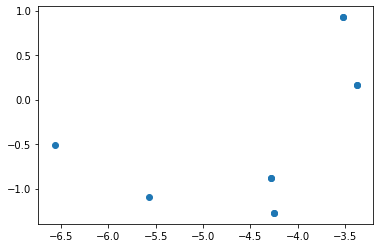

In [358]:
# for some reason this has some complex values....

plt.scatter(first_coords[0], first_coords[1])
plt.show()

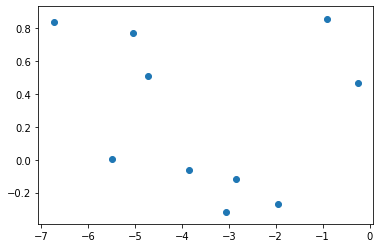

In [359]:
plt.scatter(second_coords[0], second_coords[1])
plt.show()

# A Brief Detour to Write Operations

In [241]:
test_tensor = np.array([[[1, 5], [2, 6]], [[3, 7], [4, 8]]])
n, m, p = test_tensor.shape

test_tensor, n, m, p

(array([[[1, 5],
         [2, 6]],
 
        [[3, 7],
         [4, 8]]]), 2, 2, 2)

In [242]:
# just tryna get my brain around things jesus christ
yikes = test_tensor[:,:,0:1]

yikes, yikes.shape

(array([[[1],
         [2]],
 
        [[3],
         [4]]]), (2, 2, 1))

In [306]:
# tensor circulant
def t_circ(A):
    n, m, p = A.shape
    
    #print(n,m,p)
    
    res = np.zeros((n*p, m*p))
    
    res[:, 0:m] = unfold(A)
    
    for j in range(1, p):
        #print(str(j) + " ~~~~~~")
        #print(res)
        
        
        #print((p-1)*n, p*n, (j-1)*m, (j)*m+1)
        
        first_thing = res[(p-1)*n:p*n, (j-1)*m:(j)*m]
        #             mA((p-1)*n+1:p*n,(j-2)*m+1:(j-1)*m) 
        
        #print(first_thing)
        
        #print(0, (p-1)*n, (j-1)*m, j*m)
        second_thing = res[0:(p-1)*n, (j-1)*m:j*m]
        #              mA(1:(p-1)*n,(j-2)*m+1:(j-1)*m)
        #print(second_thing)
        
        #print(first_thing.shape, second_thing.shape)
        
        the_thing = np.concatenate((first_thing, second_thing), axis=0)
        #print(the_thing)
        
        #print(j*m, (j+1)*m)
        
        res[:, j*m:(j+1)*m] = the_thing
    
    return res

r = t_circ(t)
r

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [71]:
# tensor unfold
def unfold(A):
    n, m, p = A.shape
    v_res = np.zeros((n*p, m))
    
    for i in range(0, p):
        temp = A[:,:,i]
        v_res[i*n:(i+1)*n,0:m] = A[:,:,i]
    
    return v_res

In [286]:
# tensor fold up
def fold_up(A, n1, n2, n3):
    
    knt = 0
    res = np.zeros((n1,n2,n3))
    
    for i in range(0, int(n3)):
        #print(knt, knt+n1, 0, n2)
        res[:,:,i] = A[knt:knt+n1, 0:n2]
        knt += n1
        
    return res
    
"""
function Y=fold_up(A,n1,n2,n3)

% Y=fold_up(A,n1,n2,n3)
%
% fold the array in A back up into a tensor.
% A should be n1*n3 x n2
 
 knt=0; Y=zeros(n1,n2,n3);
 
 for i=1:n3
     Y(:,:,i)=A(knt+1:knt+n1,1:n2); knt=knt+n1;
 end

"""

#lmao f_upp xdddddd
#f_up = fold_up(r,2,2,2)
#f_up

#val = fold_up(unfold(test_tensor),2,2,2)
#val

# this is hot
np.array_equal(test_tensor, fold_up(unfold(test_tensor),2,2,2))

True

In [323]:
# tensor transpose
def t_tran(A):
    ten_circ = t_circ(A)
    #print(ten_circ.shape)
    ten_circ = ten_circ.transpose()
    #print(ten_circ.shape)
    n2,n1,n3 = A.shape
    #print(n1,n2,n3)
    res = fold_up(ten_circ, n1, n2, n3)
    return res 

In [288]:
# oh boy, heres the big moment......
r = t_tran(test_tensor)
print(printFrontalSlices(test_tensor))
print("~~~")
print(printFrontalSlices(r))


[[1 2]
 [3 4]]
[[5 6]
 [7 8]]

~~~

[[1. 3.]
 [2. 4.]]
[[5. 7.]
 [6. 8.]]



In [289]:
def printTensorTheRightWay(A):
    _, _, p = A.shape
    rep = ""
    for i in range(0,p):
        vals = A[:,:,i:i+1].reshape(2,2)
        rep += str(vals)
        rep += "\n"
        
    return rep

# also known as

def printFrontalSlices(A):
    _, _, p = A.shape
    rep = "\n"
    for i in range(0,p):
        vals = A[:,:,i:i+1].reshape(2,2)
        rep += str(vals)
        rep += "\n"
        
    return rep

In [308]:
a,b,c = t.shape

np.array_equal(t, fold_up(unfold(t),a,b,c))

True